# Trabalho Ciência de dados

<h4>Grupo:</h4>
<p>
    <br>Christopher Martins
    <br>Daniel Lopes
    <br>Douglas Gonçalves Sales
</p>

# Sobre a Linguagem

 O Python é uma linguagem interpretada de alto nível e foi escolhida pelo mérito acumulado ao longo de 28 anos de desenvolvimento.

<h4><strong>Facilidade de Aprendizado e de Uso:</strong></h4>
    <br>Python é uma linguagem de alto nível e de fácil aprendizado. Com isso, podemos começar a analisar os dados sem perder tempo descobrindo particularides da linguagem. De acordo com Stackoverflow, de 2018, o Python é a linguagem de programação mais popular do mundo, e é considerada uma linguagem para iniciantes, onde qualquer pessoa que possua um conhecimento básico de programação consegue utiliza-la.   
    
<h4><strong>Grande Comunidade:</strong></h4>
    <br>A linguagem é amplamente utilizada para ciência de dados, e possui uma comunidade expecialista e colaborativa. O problema que um utilizador novato de Python vivencia, provavelmente já foi resolvido por um outro usuário mais experiente.  
    
<h4><strong>Grande Número de Bibliotecas e Frameworks:</strong></h4> 
    <br>A linguagem Python possui uma enorme variablidade de bibliotecas, desde a mais básicas como expressões regulares até inteligência artificial e aprendizado ao homem máquina, conexões HTTP seguras, processamento de XML e HTML, bancos de dados, net scraping, etc.  

<h4><strong>Atualizada Constantemente:</strong></h4>
    <br>Python é uma linguagem em desenvolvimento, constantemente atualizada. Muitos dos problemas vivenciados a pouco tempo atrás já não existem mais, e os problemas que existem hoje podem não existirão mais daqui a algum tempo.

<h4><strong>Popularidade no Mercado:</strong></h4>
   <br>Desde seu lançamento em 1991, Python têm evoluido para se tornar uma das linguagens de programação mais dinâmicas e populares no mercado visto que é extremamente versátil. eSeu uso se extende desde análise de dados até aplicações web e aprendizagem de máquina.
       

# Dataset

# Pandas e NumPy

Duas das bibliotecas mais usadas para análise de dados são o Pandas e o NumPy, de acordo com datascienceacademy. Ambos serão utilizados neste trabalho.
Pandas é uma biblioteca Python para análises de dados que, de acordo com a documentação oficial, é de alta performance e de fácil utilização. Entre suas funcionalidades a mais comum é a de importação de arquivos CSV através do comando pandas.read_csv() que gera um arquivo do tipo "DataFrame", que pode então ser análisado e editado.


# PRECISAMOS EDITAR
Arquivos no Dataset:

1- Columns.cvs
Lista e descreve as Colunas do arquivo League of Legends.csv

2- bans.csv
Lista os nomes dos campeões que foram banidos em cada partida, em qual ordem (ban_1~ban_5) e se foram escolhidos pelo time azul ou vermelho (Team).

3- gold.csv
Estatísticas de recolhimento de ouro de cada time (Type) ao longo do tempo (min_1 ~ min_95).

4- kills.csv
Lista dos jogadores que mataram, foram mortos ou deram assistência (Team, Killer, Victim, Assist_1 ~ Assist_4), em que posição do mapa (x_pos, y_pos) e em que tempo do jogo isso aconteceu (Time).

5- LeagueofLegends.csv 
Lista qual o tipo do jogo e campeonato e em qual ano, em qual temporada (League, Year, Season, Type) , as equipes que participaram (TeamTags), o resultado da partida (Results). A duração da partida (gamelenght). Demonstra a diferença em ouro entre as equipes, as mortes dos personagens, quais e quando os objetivos foram alcançados. Os jogos ainda possuem um link para o site do jogo, onde são listadas ainda mais informações sobre a partida.

6- matchinfo.csv
Contém Informações reduntantes (League, Year, Season, Type) e também sobre os jogadores e campeões escolhidos para cada time (28 Colunas).

7- monsters.csv
Lista de quando (Time) o time Vermelho ou Azu (Team)l derrotaram o Dragão ou o Barão nashor (Type).

8- structures.csv
Lista de estruturas destruídas por cada time (Team, Lane, Type) em cada momento do jogo(Time).


<h4><strong>Arquivos do Dataset</strong></h4>

In [ ]:
import getpass, os, pandas, requests, math

user = getpass.getuser()
path = str("/home/" + str(user) + "/datasets/")
os.listdir(path)


<h4><strong>Importação</strong></h4>

In [ ]:
data = pandas.read_csv(path + str("data.csv"))
refs = pandas.read_json(path + str("refs.json"))
print(data.columns)

<h4><strong>Limpeza dos Dados</strong></h4>

<h4><strong>Filtragem de Dados</strong></h4>

In [94]:
class_dict = {
    'blue':'mage' ,
    'magenta':'priest',
    'yellow':'paladin' ,
    '#554c70':'warlock',
    'cyan':'druid',
    'purple':'shaman',
    'red':'warrior',
    'gray':'rogue',
    'green':'hunter',
}

In [97]:
class_count = data['deck_class'].value_counts()
rating_count = data['rating'].value_counts()
deck_type_count = data['deck_type'].value_counts()
title_count = data['title'].value_counts()
decks_year = data['date'].str.slice(0,4)
len(data['deck_archetype'].value_counts())

filter_decks_2017 = decks_year == '2017'
filter_decks_2016 = decks_year == '2016'
filter_decks_2015 = decks_year == '2015'
filter_decks_2014 = decks_year == '2014'
filter_decks_2013 = decks_year == '2013'

filter_mage_decks = data['deck_class'] == 'Mage' # blue
filter_priest_decks = data['deck_class'] == 'Priest' # magenta
filter_paladin_decks = data['deck_class'] ==  'Paladin' # yellow
filter_warlock_decks = data['deck_class'] == 'Warlock' # black
filter_druid_decks = data['deck_class'] == 'Druid' # cyan
filter_shaman_decks = data['deck_class'] == 'Shaman' # purple
filter_warrior_decks = data['deck_class'] == 'Warrior' # red
filter_rogue_decks = data['deck_class'] ==  'Rogue' # gray
filter_hunter_decks = data['deck_class'] == 'Hunter' # green
filter_wild = data['deck_format'] == 'W'
filter_standard = data['deck_format'] == 'S'

filter_mage_standard_decks = filter_standard & filter_mage_decks
filter_mage_wild_decks = filter_wild & filter_mage_decks
filter_priest_standard_decks = filter_standard & filter_priest_decks
filter_priest_wild_decks = filter_wild & filter_priest_decks
filter_paladin_standard_decks = filter_standard & filter_paladin_decks
filter_paladin_wild_decks = filter_wild & filter_paladin_decks
filter_warlock_standard_decks = filter_standard & filter_warlock_decks
filter_warlock_wild_decks = filter_wild & filter_warlock_decks
filter_druid_standard_decks = filter_standard & filter_druid_decks
filter_druid_wild_decks = filter_wild & filter_druid_decks
filter_shaman_standard_decks = filter_standard & filter_shaman_decks
filter_shaman_wild_decks = filter_wild & filter_shaman_decks
filter_warrior_standard_decks = filter_standard & filter_warrior_decks
filter_warrior_wild_decks = filter_wild & filter_warrior_decks
filter_rogue_standard_decks = filter_standard & filter_rogue_decks
filter_rogue_wild_decks = filter_wild & filter_rogue_decks
filter_hunter_standard_decks = filter_standard & filter_hunter_decks
filter_hunter_wild_decks = filter_wild & filter_hunter_decks

card_col = ['card_' + str(i) for i in range(30)]
data


,craft_cost,date,deck_archetype,deck_class,deck_format,deck_id,deck_set,deck_type,rating,title,...,card_20,card_21,card_22,card_23,card_24,card_25,card_26,card_27,card_28,card_29
0,9740,2016-02-19,Unknown,Priest,W,433004,Explorers,Tavern Brawl,1,Reno Priest,...,374,2280,2511,2555,2566,2582,2683,2736,2568,2883
1,9840,2016-02-19,Unknown,Warrior,W,433003,Explorers,Ranked Deck,1,RoosterWarrior,...,1781,1781,2021,2021,2064,2064,2078,2510,2729,2736
2,2600,2016-02-19,Unknown,Mage,W,433002,Explorers,Theorycraft,1,Annoying,...,1793,1801,1801,2037,2037,2064,2064,2078,38710,38710
3,15600,2016-02-19,Unknown,Warrior,W,433001,Explorers,None,0,Standart pay to win warrior,...,1657,1721,2018,2296,2262,336,2729,2729,2736,2760
4,7700,2016-02-19,Unknown,Paladin,W,432997,Explorers,Ranked Deck,1,Palamix,...,2027,2029,2029,2064,2078,374,2717,2717,2889,2889
5,5740,2016-02-19,Unknown,Warrior,W,432995,Explorers,Ranked Deck,2,Kolento's Elise Control Warrior,...,1793,1805,1805,1808,1808,2021,2729,2729,2736,2951
6,1800,2016-02-19,Unknown,Warrior,W,432998,Explorers,Arena,1,Arena Simulation #484,...,2050,2064,2064,2257,2490,2495,2495,2521,2576,2580
7,1800,2016-02-19,Unknown,Warlock,W,432993,Explorers,Arena,1,Arena Simulation #483,...,2067,2071,2071,2073,2093,2306,2490,2507,2520,2752
8,8780,2016-02-19,Unknown,Priest,W,432992,Explorers,Ranked Deck,1,Djinn Dragon Priest (S23),...,1935,2286,2286,2409,2569,2569,2682,2748,2925,3015
9,4080,2016-02-19,Unknown,Warlock,W,432991,Explorers,Tavern Brawl,1,Battlecry Zoo-Malygos Combo,...,1806,2037,2037,2042,2078,2093,2262,2895,2895,2949


In [59]:
# lista = []
# lista_temp = {}
# for x in range(0,(len(data))):
#     for i in range(0,1):
#         lista_temp = (data.get_value(x, 'card_' + str(i)))
#     lista.append(lista_temp)
# print('cabei')


<h4><strong>Análise Exploratória dos Dados</strong></h4>

In [60]:
# import math
# 
# lista_temp = []
# lista = []
# for x in range(0,(math.trunc(len(data)/100))):
#     for i in range(0,30):
#         lista_temp.append(data.get_value(x, 'card_' + str(i)))
#     lista.append(lista_temp)
# print(lista)

<h5>Histograma</h5>

Média - Desvio Padrão
Desvio ++ = maior largura da curva
Desvio -- = menor largura da curva


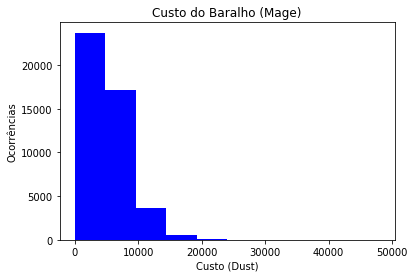

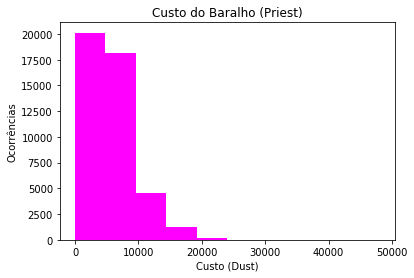

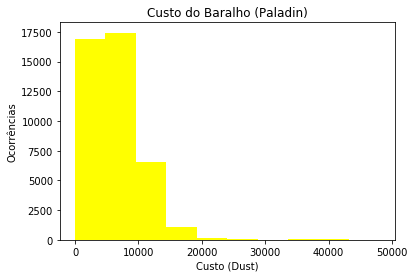

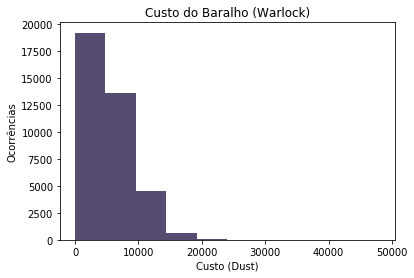

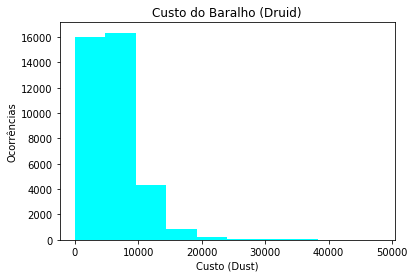

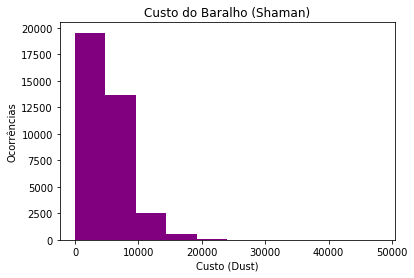

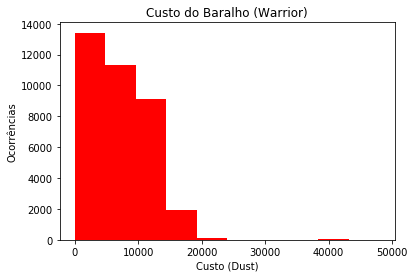

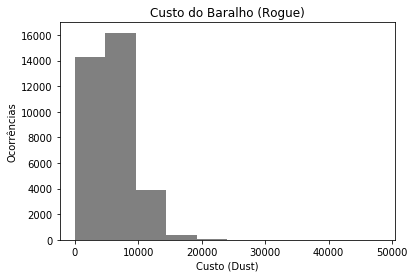

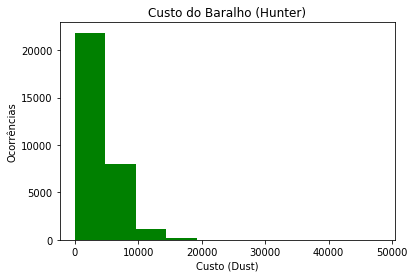

In [85]:
import matplotlib.pyplot as plt
 
#Talvez seja melhor mudar pra BoxPlot
plt.hist(data[filter_mage_decks].craft_cost, color= "blue", histtype="bar")
plt.title("Custo do Baralho (Mage)")
plt.xlabel("Custo (Dust)")
plt.ylabel("Ocorrências")
plt.savefig("graphs/cost/dust_mage.png",dpi=300)
mage_plot = plt.show()

plt.hist(data[filter_priest_decks].craft_cost, color= "magenta", histtype="bar")
plt.title("Custo do Baralho (Priest)")
plt.xlabel("Custo (Dust)")
plt.ylabel("Ocorrências")
plt.savefig("graphs/cost/dust_priest.png",dpi=300)
plt.show()

plt.hist(data[filter_paladin_decks].craft_cost, color= "yellow", histtype="bar")
plt.title("Custo do Baralho (Paladin)")
plt.xlabel("Custo (Dust)")
plt.ylabel("Ocorrências")
plt.savefig("graphs/cost/dust_paladin.png",dpi=300)
plt.show()

plt.hist(data[filter_warlock_decks].craft_cost, color= "#554c70", histtype="bar")
plt.title("Custo do Baralho (Warlock)")
plt.xlabel("Custo (Dust)")
plt.ylabel("Ocorrências")
plt.savefig("graphs/cost/dust_warlock.png",dpi=300)
plt.show()

plt.hist(data[filter_druid_decks].craft_cost, color= "cyan", histtype="bar")
plt.title("Custo do Baralho (Druid)")
plt.xlabel("Custo (Dust)")
plt.ylabel("Ocorrências")
plt.savefig("graphs/cost/dust_druid.png",dpi=300)
plt.show()

plt.hist(data[filter_shaman_decks].craft_cost, color= "purple", histtype="bar")
plt.title("Custo do Baralho (Shaman)")
plt.xlabel("Custo (Dust)")
plt.ylabel("Ocorrências")
plt.savefig("graphs/cost/dust_druid.png",dpi=300)
plt.show()

plt.hist(data[filter_warrior_decks].craft_cost, color= "red", histtype="bar")
plt.title("Custo do Baralho (Warrior)")
plt.xlabel("Custo (Dust)")
plt.ylabel("Ocorrências")
plt.savefig("graphs/cost/dust_warrior.png",dpi=300)
plt.show()

plt.hist(data[filter_rogue_decks].craft_cost, color= "gray", histtype="bar")
plt.title("Custo do Baralho (Rogue)")
plt.xlabel("Custo (Dust)")
plt.ylabel("Ocorrências")
plt.savefig("graphs/cost/dust_rogue.png",dpi=300)
plt.show()

plt.hist(data[filter_hunter_decks].craft_cost, color= "green", histtype="bar")
plt.title("Custo do Baralho (Hunter)")
plt.xlabel("Custo (Dust)")
plt.ylabel("Ocorrências")
plt.savefig("graphs/cost/dust_hunter.png",dpi=300)
plt.show()



In [49]:
n_leagues = league_of_legends['League'].value_counts()
n_leagues.plot.bar(title='Número Campeonatos Regionais', legend=None)
plt.tight_layout()
plt.savefig("Regional.png", dpi=300)
plt.show()
# n_bans_1 = bans['ban_1'].value_counts()
# n_bans_1.plot.bar(title='Bans da Partida', legend=None)
# plt.tight_layout()
# plt.savefig("Bans.png", dpi=300)
# plt.show()

NameError: name 'league_of_legends' is not defined

<h4>Boxplot</h4>

In [ ]:
# structures.plot.box()
# match_info["gamelength"].plot.box()
# result_match = league_of_legends[['bResult', 'rResult']]
# plt.boxplot(match_info["gamelength"] + structures["Time"])
# plt.boxplot(match_info.gamelength)
teste = [match_info.gamelength, structures.Time, kills.Time, monsters.Time]
plt.boxplot(teste)

<h4>Pizza</h4>

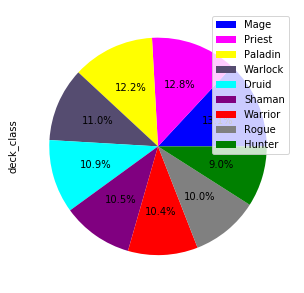

In [95]:
class_count.plot.pie(autopct='%.1f%%', colors=class_dict, figsize=(5,5), legend=True, labels=None)

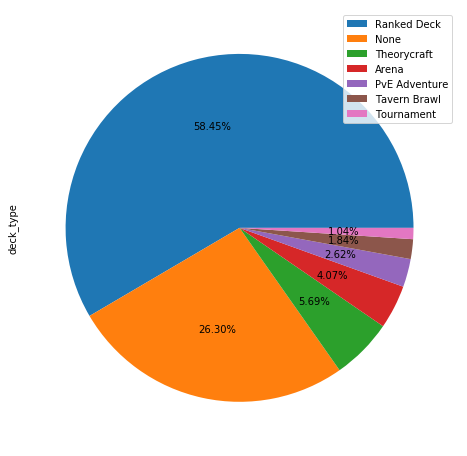

In [77]:
deck_type_count.plot.pie(autopct='%.2f%%', figsize=(8,8), legend=True, labels=None)


<h4>Bubble</h4>

In [ ]:
import seaborn as sns

sns.scatterplot(x= rating_count, y= kills.Time)

In [ ]:
plt.scatter(kills['x_pos'], kills['y_pos'])
# plt.scatter(gold['min_3'],gold['min_4'])
# plt.scatter(gold['min_5'],gold['min_6'])


<h4><strong>Conclusão</strong></h4>
       <br> É possivel integrar o Python com frameworks para Web (como Django ou Flask) e com outras linguagens (como Javascript), o que aumenta as possibilidades de desenvolvimento. Além disso, existem diversas bibliotecas disponíveis para análise de dados. Este pacote inclui diversas utilidades, entre elas o Pandas, Numpy, Holoviews. Além disso, por ser mais antigo, Python é mais robusto e menos propenso a mudanças drásticas. 
    <br>  Python é uma linguagem de propósito geral bem estabelecida, ao contrário do R que é uma linguagem mais especializada e do Júlia que é uma linguagem relativamente nova, sendo assim a experiência adiquirida terá um maior potêncial de uso em aplicações futuras, seja em outros trabalhos ou no mercado.
    <br> Apesar da deficiência do Python para programação paralela, acreditamos que a facilidade de codificar usando a linguagem trará uma vantagem mais significativa do que tempo de execução e mais liberdade para focar na análise dos dados, sem se preocupar com aprender as nuances de uma nova linguagem.
    <br> Existem também uma biblioteca para rodar códico R em python caso alguma funcionalidade específica do R seja necessária.

# Referências:

<h4>League of Legends - Competitive Matches, 2015 to 2018</h4>
(https://www.kaggle.com/chuckephron/leagueoflegends)

<br>https://www.python.org
<br>Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython Por Wes McKinney
<br>https://books.google.com.br/books?hl=pt-BR&lr=&id=v3n4_AK8vu0C&oi=fnd&pg=PR3&dq=python+for+data+analysis&ots=rgJL4hyrqx&sig=v6onow7Ag9Qs4S11awiGeHLpSd4#v=onepage&q&f=false
<br>http://www.cienciaedados.com/por-que-cientistas-de-dados-escolhem-python/
<br>https://www.cbtnuggets.com/blog/technology/data/why-data-scientists-love-python    
https://hackncast.org/v06-python
<br>https://minerandodados.com.br/por-que-o-python-e-a-linguagem-mais-adotada-na-area-de-data-science/
<br>Wes McKinney Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython (2012)
<br>https://cio.com.br/julia-vs-python-qual-e-a-melhor-para-a-ciencia-de-dados/
<br>http://datascienceacademy.com.br/blog/top-20-bibliotecas-python-para-data-science/


In [ ]:

#url = "https://..."
#s= requests.get(url).content #Puxa uma url da rede 
#c= pd.read_csv(io.StringIO(s.decode('utf-8'))) #Puxa um dataset da url

#FICO BUNITO MAIS DEU BOSTA
#for x in arquivos:
#    dataset = pandas.read_csv('/home/' + str(user) + '/Downloads/datasets/' + str(x))
#    lista_temp = {
#    
#        'nome': x,
#        'dataset': dataset,
#    }
#    lista_datasets.append(lista_temp)

# print(league_of_legends) 
# league = league_of_legends[["League", "bResult"]] #Dois Colchetes = Selecionar linhas e colunas de um único dataset
# print(league)
#league_of_legends.loc[0] # Seleciona uma Linha do dataset
# league_of_legends.iloc[0] # Seleciona uma Linha do dataset
# league_of_legends.loc[[0]] # Seleciona uma Linha do dataset
# league_of_legends.iloc[[0]] # Seleciona uma Linha do dataset

# league_of_legends_nalcs_btag = league
# league_nalcs_2015 = league_nalcs and league_2015
# # print(league_nalcs)
# print(league_of_legends[league_nalcs_2015])